## Week 8 Python Importing Library 

In [72]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.path.abspath('../Scripts'))
from data_loading import CSVReader
from eda import DataPreprocessor
from plot import Visualization
# from preprocessing import FeatureEngineering
# from credit_scoring import CreditScoring
from train_model import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# pip install mlflow

In [14]:
# Create an instance of CSVReader
read_csv_data = CSVReader('../../10_X_data/creditcard.csv')
read_csv_data1 = CSVReader('../../10_X_data/Fraud_Data.csv')
read_csv_data2 = CSVReader('../../10_X_data/IpAddress_to_Country.csv')

In [63]:
# Load the CSV file
df = read_csv_data.read_csv()
df1 = read_csv_data1.read_csv()
df2 = read_csv_data2.read_csv()

CSV file successfully loaded.
CSV file successfully loaded.
CSV file successfully loaded.


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
df2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Check if there is missed values

In [19]:
df[df.isna().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [20]:
df1[df1.isna().any(axis=1)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class


In [21]:
df2[df2.isna().any(axis=1)]

,lower_bound_ip_address,upper_bound_ip_address,country


In [64]:
preprocessor = DataPreprocessor(df, df1, df2)

#### Actually the data doesn't have missed values but if it happen it can be handle in the below code

In [65]:
df_cleaned, df1_cleaned, df2_cleaned = preprocessor.handle_missing_values()

Missing values handled.


In [10]:
df_cleaned.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check if there is duplicated values

In [30]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [29]:
df1[df1.duplicated()]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class


In [28]:
df2[df2.duplicated()]

,lower_bound_ip_address,upper_bound_ip_address,country


### Handle Duplicate data

In [66]:
df_cleaned, df1_cleaned, df2_cleaned = preprocessor.remove_duplicates()

Duplicates removed.


In [27]:
df_cleaned.shape, df1_cleaned.shape, df2_cleaned.shape

((283726, 31), (151112, 11), (138846, 3))

### Correct datatype

#### Check datatype

In [39]:
print("First dataframe\n")
print(f"{df_cleaned.info()}\n")
print("Second dataframe\n")
print(f"{df1_cleaned.info()}\n")
print("Third dataframe\n")
print(f"{df2_cleaned.info()}\n")

First dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21

##### As we on the first and second dataframe we have **signup_time**, and **purchase_time** as object but they are should not be in that format, also IP Address need to be as an float 

In [47]:
df1_cleaned.purchase_time.head()

0   2015-04-18 02:47:11
1   2015-06-08 01:38:54
2   2015-01-01 18:52:45
3   2015-05-04 13:54:50
4   2015-09-09 18:40:53
Name: purchase_time, dtype: datetime64[ns]

In [67]:
df1_cleaned, df2_cleaned = preprocessor.correct_data_types()

Data types corrected.


In [46]:
df1_cleaned.purchase_time.dtypes

dtype('<M8[ns]')

### Merge Dataset

In [68]:
merged_df = preprocessor.merge_datasets()

Datasets merged.


In [69]:
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN


In [70]:
merged_df = merged_df.drop(columns=['country'])

In [71]:
merged_df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [73]:
merged_df.shape

(151112, 11)

#### EDA using visualization

In [84]:
plot = Visualization(df_cleaned, merged_df)

In [91]:
merged_df.select_dtypes(include=['number']).columns

Index(['user_id', 'purchase_value', 'age', 'ip_address', 'class',
       'transaction_count', 'hour_of_day', 'day_of_week'],
      dtype='object')

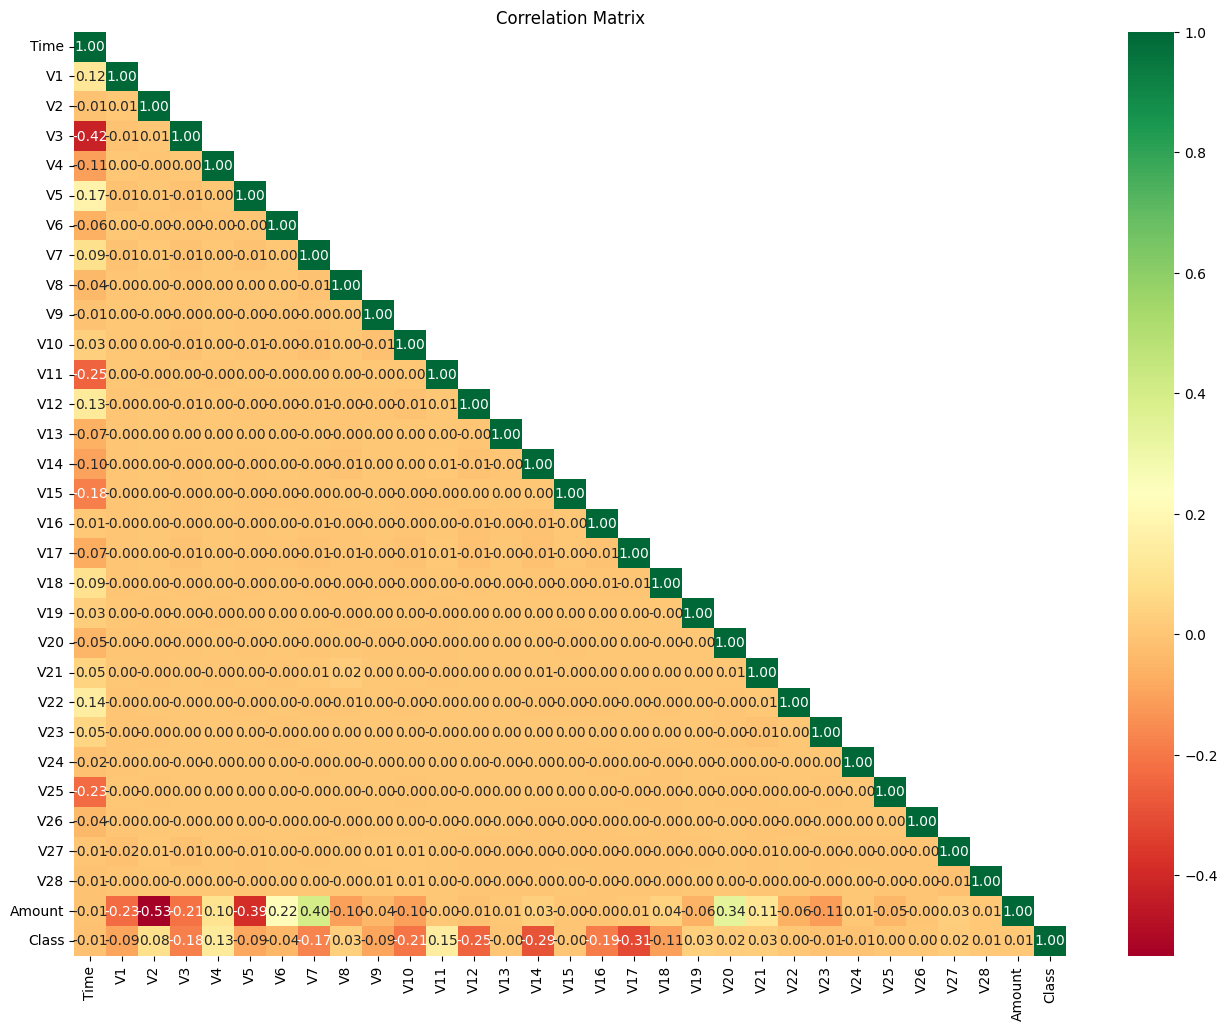

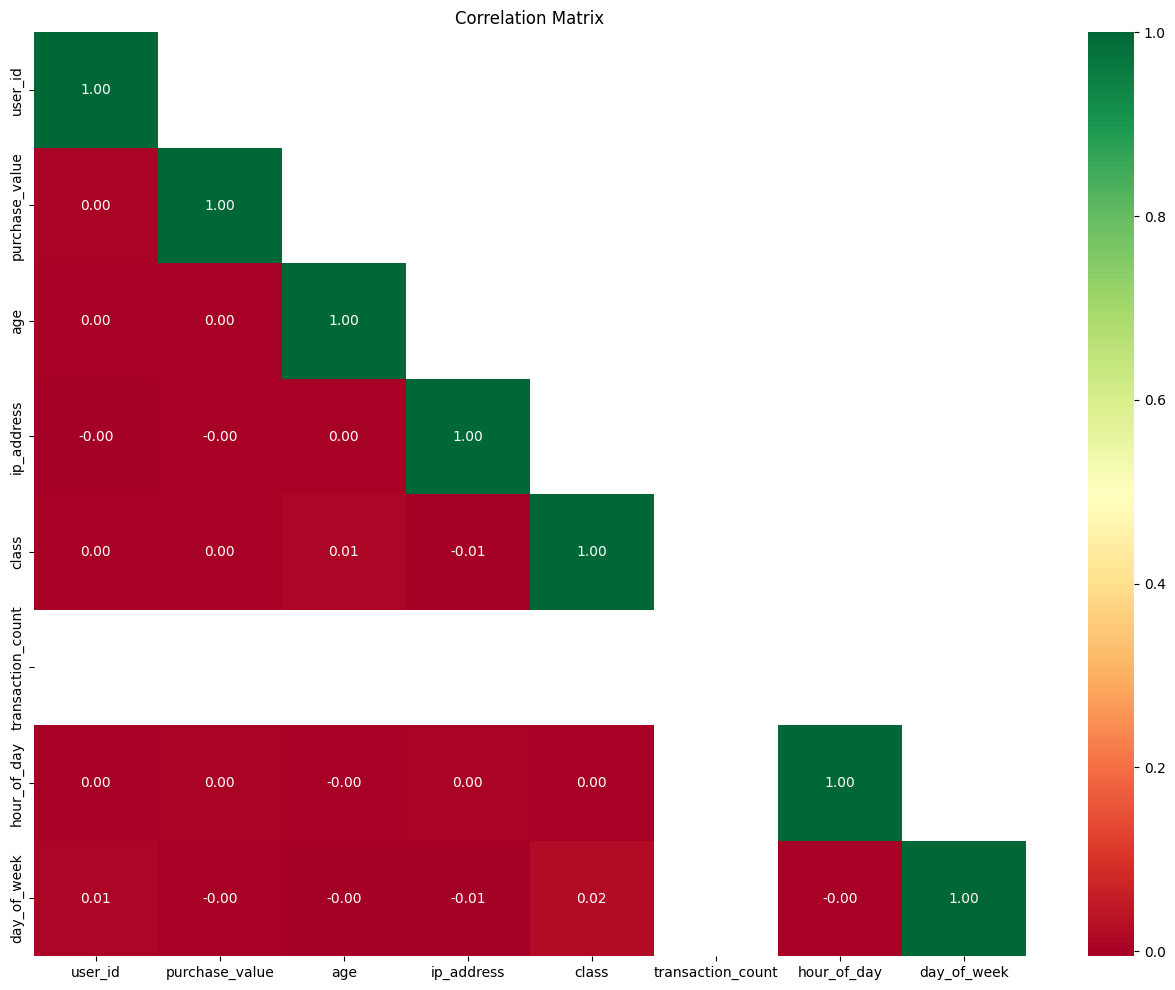

In [93]:
plot.eda()

### Feature Engineering

In [94]:
merged_df.columns, df_cleaned.columns

(Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
        'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
        'transaction_count', 'hour_of_day', 'day_of_week'],
       dtype='object'),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'))

In [95]:
df_cleaned.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [79]:
eng_df = preprocessor.feature_engineering(merged_df)

Feature engineering completed.


In [80]:
eng_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_count,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,18,2


In [81]:
eng_df.isna().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age                  0
ip_address           0
class                0
transaction_count    0
hour_of_day          0
day_of_week          0
dtype: int64

### Normalization

In [97]:
normalized_df = preprocessor.normalize_and_scale(df_cleaned)

Normalization applied.


In [98]:
normalized_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


### Converting Categorical data

In [110]:
encoded = preprocessor.encode_categorical_features(eng_df)

TypeError: Categorical.__init__() got an unexpected keyword argument 'columns'

In [109]:
import pandas as pd 
# eng_df['browser_encoded'] = pd.Categorical(eng_df['browser']).codes
eng_df = eng_df.drop(columns='browser_encoded')

In [108]:
eng_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_count,hour_of_day,day_of_week,browser_encoded
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,2,5,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,1,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,18,3,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,13,0,4
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,18,2,4


In [96]:
# preprocessor.preprocess()

In [16]:
df_clean, df1_clean, df2_clean = preprocessor.get_processed_data()
    
print("Preprocessing complete. Data is ready for further analysis.")

Preprocessing complete. Data is ready for further analysis.


In [19]:
df2_clean

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,1.677747e+07,Australia
1,1.677747e+07,1.677773e+07,China
2,1.677773e+07,1.677824e+07,China
3,1.677824e+07,1.677926e+07,Australia
4,1.677926e+07,1.678131e+07,China
...,...,...,...
138841,3.758092e+09,3.758093e+09,Hong Kong
138842,3.758093e+09,3.758094e+09,India
138843,3.758095e+09,3.758096e+09,China
138844,3.758096e+09,3.758096e+09,Singapore


## Task 2 

In [ ]:
 
trainer = ModelTrainer(df_clean, df2_clean)
trainer.run_experiments()

print("Model training and evaluation complete.")